## Import required libraries

In [5]:
import torch
import torch.nn as nn
from torch import optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import os

## Transformations

In [6]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5),(0.5)),
])

## Load Datasets

In [7]:
train_data=datasets.FashionMNIST(root= r'.\data' ,
                          download = True ,
                          train = True ,
                          transform = transform)

100.0%
100.0%
100.0%
100.0%


In [8]:
test_data=datasets.FashionMNIST(root='.\data',
                         download=True,
                         train=True,
                         transform=transform)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Admin\AppData\Local\Temp\ipykernel_5576\2705148463.py:1: SyntaxWarning: invalid escape sequence '\d'
  test_data=datasets.FashionMNIST(root='.\data',


In [9]:
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
test_loader = DataLoader(test_data, batch_size=128, shuffle=False)

## Building Architecture of Denoising Autoencoder

In [10]:
class denoise_AE(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.enc = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1),
            nn.ReLU(True),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(True),
        )
        
        self.dec = nn.Sequential(
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1), 
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),
            nn.Tanh()
        )

    def forward(self,x):
        x = self.enc(x)
        x = self.dec(x)
        return x

# Object Creation

In [11]:
model=denoise_AE()
criterion=nn.MSELoss()
optimizer=optim.Adam(model.parameters(),lr=0.0001)

In [12]:
def add_noise(img):
    noisy = img + 0.5*torch.randn_like(img)
    noise = torch.clamp(noisy, -1.,1.)
    return noisy

In [13]:
for epoch in range(30):
    model.train()
    running_loss = 0.0
    for img,_ in train_loader:
        noisy_img = add_noise(img)
        output = model(noisy_img)
        loss = criterion(output, img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * img.size(0)
    print(f"epoch [{epoch+1}/30]")
    

epoch [1/30]
epoch [2/30]
epoch [3/30]
epoch [4/30]
epoch [5/30]
epoch [6/30]
epoch [7/30]
epoch [8/30]
epoch [9/30]
epoch [10/30]
epoch [11/30]
epoch [12/30]
epoch [13/30]
epoch [14/30]
epoch [15/30]
epoch [16/30]
epoch [17/30]
epoch [18/30]
epoch [19/30]
epoch [20/30]
epoch [21/30]
epoch [22/30]
epoch [23/30]
epoch [24/30]
epoch [25/30]
epoch [26/30]
epoch [27/30]
epoch [28/30]
epoch [29/30]
epoch [30/30]


In [14]:
model.eval()
with torch.no_grad():
    for img,_ in test_loader:
        noisy_img = add_noise(img)
        output = model(noisy_img)
        break

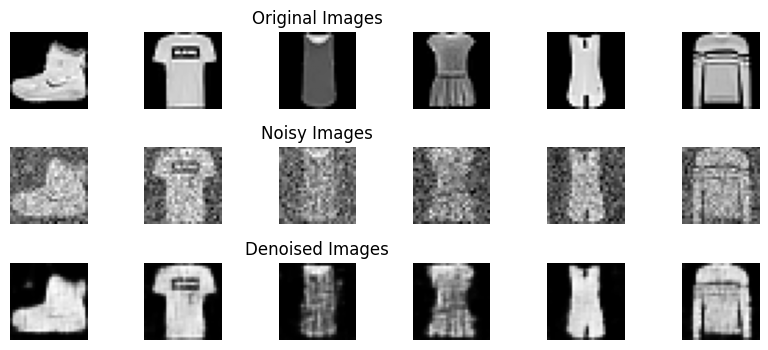

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
    
for i in range(6):
    plt.subplot(3, 6, i + 1)
    plt.imshow(img[i].cpu().numpy().squeeze(), cmap='gray')
    plt.axis('off')
    if i == 2:
        plt.title("Original Images")
        
    plt.subplot(3, 6, i + 7)
    plt.imshow(noisy_img[i].cpu().numpy().squeeze(), cmap='gray')
    plt.axis('off')
    if i == 2:
        plt.title("Noisy Images")
  
    plt.subplot(3, 6, i + 13)
    plt.imshow(output[i].detach().cpu().numpy().squeeze(), cmap='gray')
    plt.axis('off')
    if i == 2:
        plt.title("Denoised Images")
    
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()